In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn
import pickle


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import svm

import shap
# load JS visualization code to notebook
#shap.initjs()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pipreqs

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

- Conjunto de datos WINE. Consiste en 178 muestras de vino con 13 caracteriticas que describen sus diferentes propiedades  
- Los atributos son:

    - Alcohol
    - Ácido malicidio
    - Ceniza
    - Alcalinidad de ceniza
    - Magnesio
    - Total de fenoles
    - Flavanoides
    - fenoles noflavanoides
    - Proantotocianas
    - Intensidad de color
    - Hue
    - OD280/OD315 de vinos diluidos
    - Proline
 - Los grupos que se forman provienen de tres tipos distintos de uvas cultivadas en la misma región Italiana pero procedentes de diferestes viñas segun repositorio de uci.edu.co.

In [ ]:
wine_df = pd.read_csv('wine-clustering.csv')
wine_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wine_df.shape

(178, 13)

(178, 13)

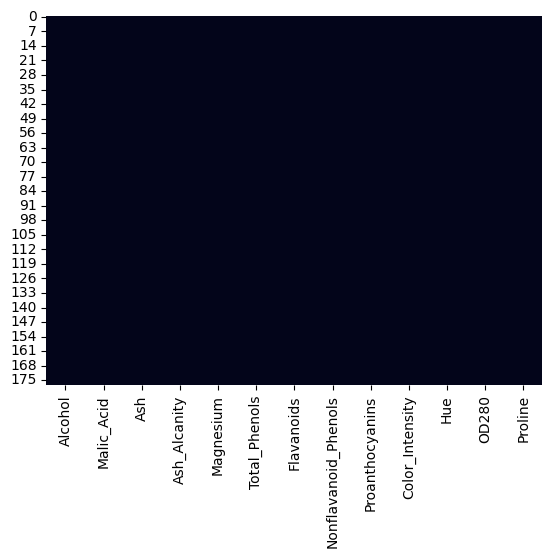

In [ ]:
import seaborn as sns
sns.heatmap(wine_df.isnull(), cbar=False)
wine_df.shape

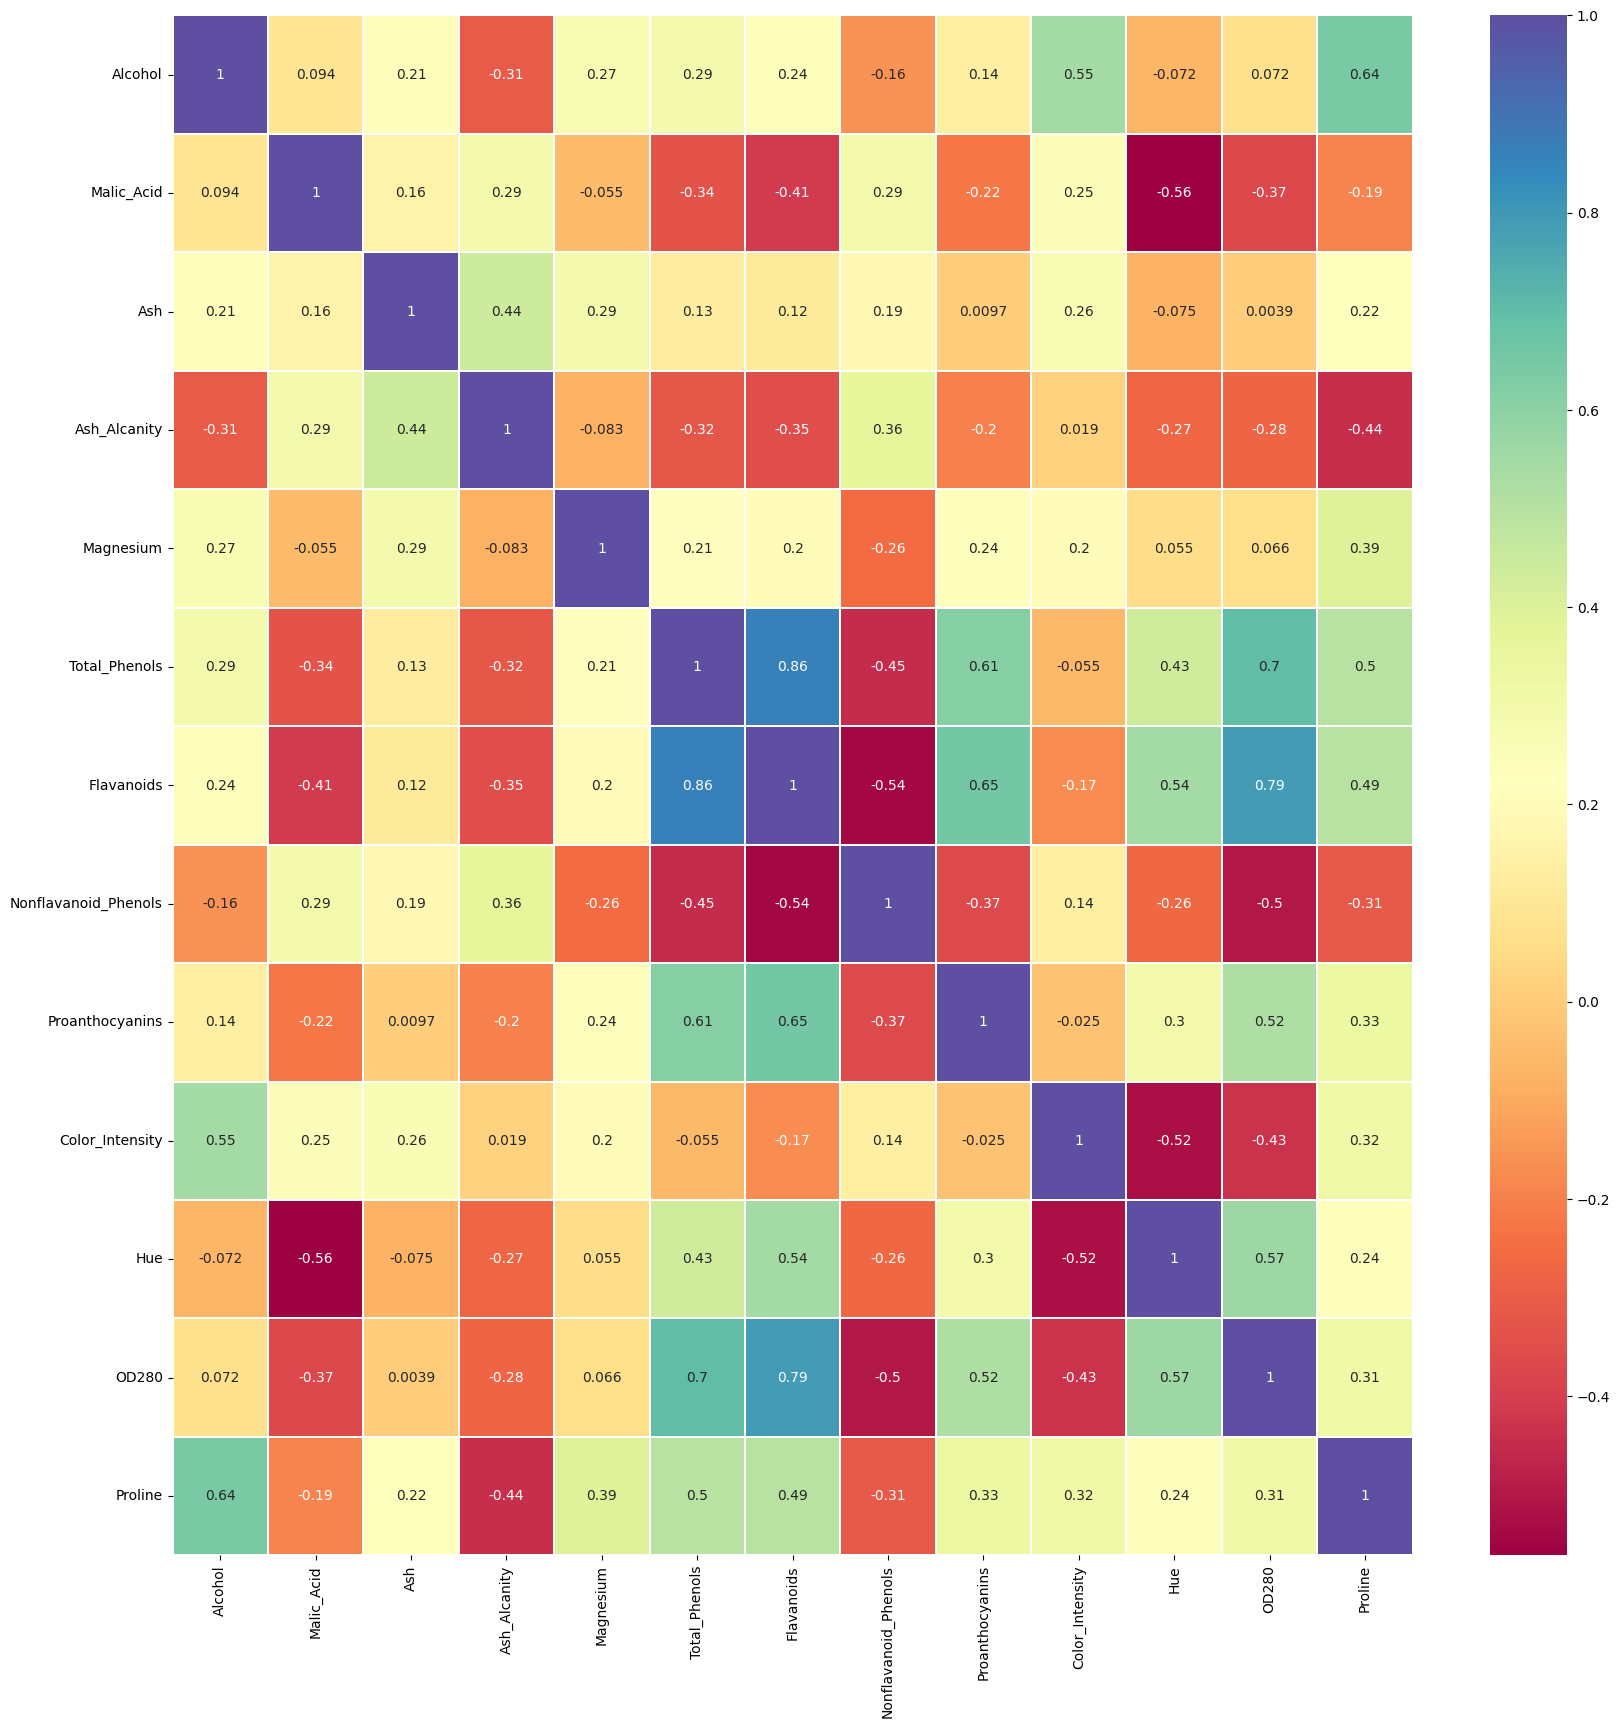

In [ ]:
# Creating a correlation heatmap
sns.heatmap(wine_df.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [ ]:
## Normalizar las características. Utilicé MinMaxScaler.
from sklearn import preprocessing
wine_value = wine_df.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
wine_scaled = min_max_scaler.fit_transform(wine_value)
wine_df_scaled = pd.DataFrame(wine_scaled, columns=wine_df.columns)
wine_df_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


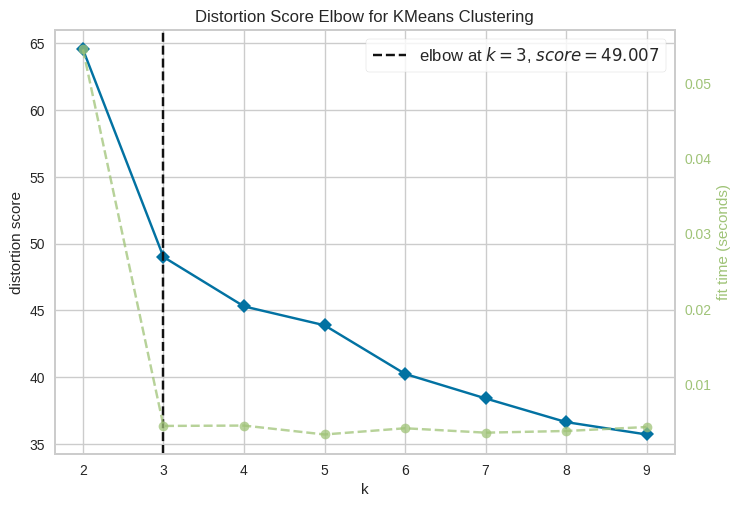

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means- Fuente: Indraneel Dutta Baruah
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(wine_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

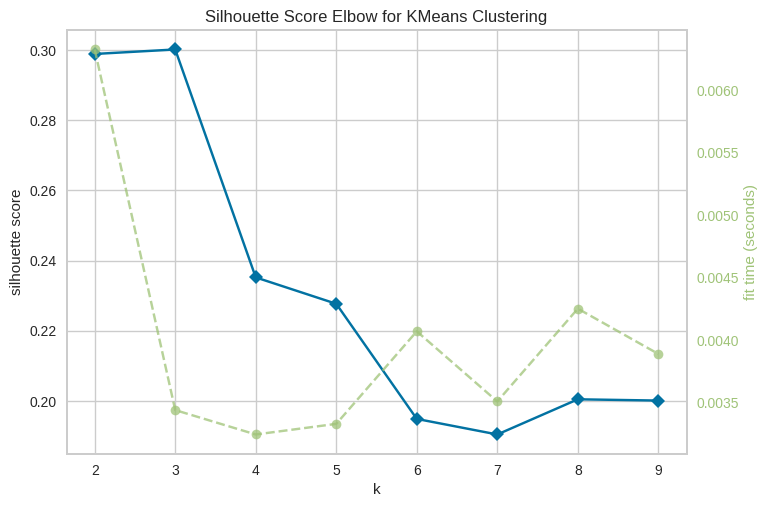

Optimal number of clusters based on silhouette score: [3]


In [ ]:
# 2# Silhouette Score for K means. Fuente: Indraneel Dutta Baruah
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(wine_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

### Para etiquetar la data, se necesita saber el Número de Cluster y Usamos Kmeans

In [ ]:
from sklearn.cluster import KMeans
# Realiza el clustering con K-Means
kmeans = KMeans(n_clusters=3)  # Número de clusters obtenidos en promedio tecnicas de clusters
labels = kmeans.fit_predict(wine_df_scaled)

In [ ]:
# Agregación de las etiquetas numéricas al DataFrame
wine_df_scaled['cluster_label'] = labels

In [ ]:
wine_df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_label
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [ ]:
wine_df_scaled.shape

In [ ]:
print(wine_df_scaled.groupby('cluster_label').size())

cluster_label
0    61
1    54
2    63
dtype: int64


## Creamos una columna con los nombres de los cluster en donde 0=vino tinto,  1=blanco, 2=rosado y convertirmos en un dataframe, Usamos IA

In [ ]:
# prompt: como creo otra columna en el dataset wine_df_scaled con los nombres para la columna de cluster_label en donde 0=vino tinto,  1=blanco, 2=rosado y convertir en un dataframe

# Crear un diccionario para mapear las etiquetas de cluster a nombres de vino
cluster_mapping = {0: 'vino tinto', 1: 'blanco', 2: 'rosado'}

# Crear la nueva columna 'wine_type' usando el mapeo
wine_df_scaled['wine_type'] = wine_df_scaled['cluster_label'].map(cluster_mapping)

# Convertir la columna 'wine_type' a tipo categórico (opcional)
wine_df_scaled['wine_type'] = pd.Categorical(wine_df_scaled['wine_type'], categories=['vino tinto', 'blanco', 'rosado'])

# Mostrar el DataFrame resultante
wine_df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_label,wine_type
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0,vino tinto
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0,vino tinto
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0,vino tinto
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0,vino tinto
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0,vino tinto


In [ ]:
# Crear un copia del dataset "wine_df_scaled" y con otro nombre  y guardar en un csv con la opción de poder descargarlo
from google.colab import files

# Create a copy of the DataFrame
wine_df_scaled_copy = wine_df_scaled.copy()

# Rename the copy (optional)
vinos_df = wine_df_scaled_copy.rename(columns={'cluster_label': 'cluster'})

# Save the copy to a new CSV file
vinos_df.to_csv('vinos_df.csv', index=False)

# Download the new CSV file
files.download('vinos_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df_vinos = pd.read_csv('/content/vinos_df.csv')
df_vinos

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,wine_type
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0,vino tinto
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0,vino tinto
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0,vino tinto
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0,vino tinto
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0,vino tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1,blanco
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1,blanco
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1,blanco
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1,blanco


In [ ]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
 13  cluster               178 non-null    int64  
 14  wine_type             178 non-null    object 
dtypes: float64(13), int64(1

In [ ]:
print(df_vinos.groupby(['cluster', 'wine_type']).size())

cluster  wine_type 
0        vino tinto    61
1        blanco        54
2        rosado        63
dtype: int64


In [ ]:
# Obtenemos variables independientes
X = df_vinos.drop(["wine_type", "cluster"], axis = 1)
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
# Obtenemos variable dependiente
y = df_vinos.pop('wine_type')
y

,wine_type
0,vino tinto
1,vino tinto
2,vino tinto
3,vino tinto
4,vino tinto
...,...
173,blanco
174,blanco
175,blanco
176,blanco


### Random Forest para la Selección de características

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

### Usamos el Random Forest para la Selección de características

In [ ]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [ ]:
feature_importances_sorted

In [ ]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X.columns, 'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

In [ ]:
#Reducimos el conjunto de datos
X_reduced = X[list(feature_importances_sorted.head(11).index)].copy()
X_reduced

###  Mezclar la base de datos

In [ ]:
X = X.sample(frac=1).reset_index(drop=True)
X.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.734211,0.199605,0.566845,0.175258,0.445652,1.000000,0.717300,0.358491,0.460568,0.492321,0.430894,0.728938,0.650499
1,0.352632,0.077075,0.427807,0.432990,0.184783,0.868966,0.582278,0.113208,0.460568,0.270478,0.601626,0.586081,0.101284
2,0.531579,0.179842,0.636364,0.381443,0.304348,0.506897,0.440928,0.301887,0.324921,0.253413,0.520325,0.454212,0.589872
3,0.750000,0.227273,0.657754,0.226804,0.336957,0.782759,0.679325,0.075472,0.406940,0.354096,0.325203,0.838828,0.582739
4,0.297368,0.171937,0.508021,0.628866,0.217391,0.275862,0.284810,0.566038,0.362776,0.099829,0.691057,0.362637,0.154779
5,0.444737,0.211462,0.449198,0.422680,0.173913,0.420690,0.462025,0.245283,0.429022,0.223549,0.552846,0.684982,0.310984
6,0.644737,0.183794,0.684492,0.613402,0.206522,0.558621,0.160338,0.735849,0.593060,0.893345,0.073171,0.186813,0.243937
7,0.547368,0.053360,0.181818,0.226804,0.086957,0.689655,0.599156,0.245283,0.589905,0.343003,0.520325,0.699634,0.159772
8,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341
9,0.331579,0.413043,0.459893,0.381443,0.195652,0.506897,0.402954,0.226415,0.498423,0.074232,0.544715,0.743590,0.008559


### Separamos datos para ajuste y prueba metodo de Holdout--- No se hizo reducción por desmejora la clasificación.

In [ ]:
from sklearn.model_selection import train_test_split # Imports the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Entrenamiento y ajuste del modelo SVM

In [ ]:
# Creamos el modelo SVM para clasificacion con kernel lineal/rbf y entrenamos el modelo
from sklearn.svm import SVC
model = SVC(kernel='linear', C=100).fit(X_train, y_train)

In [ ]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_modelsvm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

NameError: name 'pickle' is not defined

In [ ]:
# Funcion para cargar el modelo
pkl_filename = "pickle_modelsvm.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

### Desempeño del modelo

In [ ]:
# Encontramos el accuracy promedio usando datos de test
score = model.score(X_test, y_test)
print(score)

0.9722222222222222


In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['rosado', 'blanco', 'vino tinto', 'rosado', 'blanco', 'blanco',
       'rosado', 'rosado', 'rosado', 'vino tinto', 'blanco', 'rosado',
       'blanco', 'blanco', 'blanco', 'vino tinto', 'blanco', 'vino tinto',
       'rosado', 'vino tinto', 'blanco', 'vino tinto', 'rosado', 'rosado',
       'vino tinto', 'vino tinto', 'rosado', 'rosado', 'rosado', 'blanco',
       'blanco', 'rosado', 'vino tinto', 'rosado', 'blanco', 'blanco'],
      dtype=object)

In [ ]:
y_test

,wine_type
88,rosado
159,blanco
11,vino tinto
74,rosado
158,blanco
149,blanco
99,rosado
96,rosado
90,rosado
95,vino tinto


### Puntuación de precisión y matriz de confusión
- Se puede comprobar la salida prevista con la salida real del conjunto de datos de la prueba que se almacena en una variable y_test.
- Recordar que el test es del 20% son 36 muestras
- En la matriz de confusión se detectan la buena clasificacion y la la mala predicción


              precision    recall  f1-score   support

      blanco       1.00      0.93      0.96        14
      rosado       0.93      1.00      0.96        13
  vino tinto       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722222222222222
Recall: 0.9722222222222222
F1-score: 0.9722222222222222
Confusion Matrix:
[[13  1  0]
 [ 0 13  0]
 [ 0  0  9]]


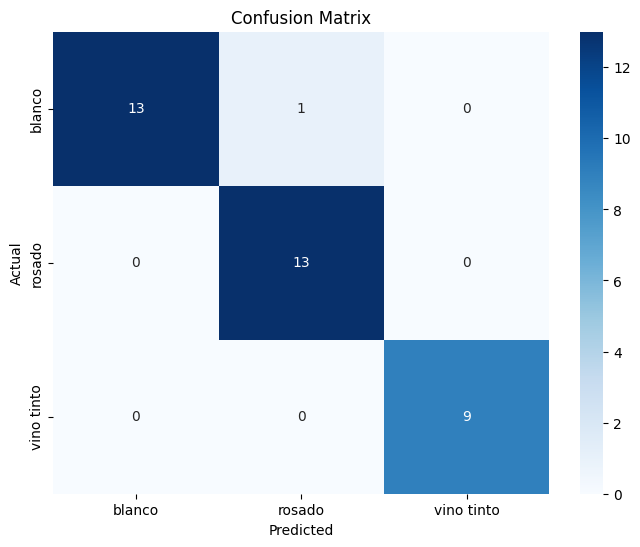

In [ ]:
# Comprobar la salida prevista con la salida real del conjunto de datos de la prueba que se almacena en una variable y_test con las metricas de: accuracy, recall y F1-score, mostrar la matriz de confusión

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted')) # weighted to handle multi-class
print("F1-score:", f1_score(y_test, y_pred, average='weighted')) # weighted to handle multi-class
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['blanco', 'rosado','vino tinto'],
            yticklabels=['blanco', 'rosado','vino tinto'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Probamos con una muestra nueva   
- Con estas caracteriticas ambientales sugiere un vino rosado.
- Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium,Total_Phenols, Flavanoids,	Nonflavanoid_Phenols, Proanthocyanins,	Color_Intensity,Hue, OD280, Proline

In [ ]:
import warnings
from sklearn.exceptions import InconsistentVersionWarning

warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

In [ ]:
import warnings #para sumprimir los errores de del mensaje
warnings.filterwarnings("ignore", message="X does not have valid feature names")
x_in = np.asarray([0.6078947368421055,0.03952569169960474,0.5347593582887699,0.3298969072164949,0.4347826086956522,0.5344827586206896,0.20253164556962022,0.7924528301886793,0.0031545741324921217,0.16126279863481227,0.43902439024390244,0.24175824175824173,0.33666191155492153]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

'blanco'

In [ ]:
# prompt: generar el requirements.txt

!pip install pipreqs

!pipreqs.


/bin/bash: line 1: pipreqs.: command not found


In [ ]:
# prompt: Generar el código de la app  para streamlit, que permita cargar un archivo csv para testear el modelo, mostrar una caja con la ingesta de los dataset que va a evaluar, crear el botón de predicción con la visualización de métricas de accuracy,  recall y F1-score, crear un boton para cerrar la aplicación y crear un botón para imprimir y visualizar la matriz de confusión

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
import pickle
import numpy as np

# Load the trained model
pkl_filename = "pickle_modelsvm.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

def predict_wine_type(input_data):
    prediction = model.predict(input_data)
    return prediction[0]

def main():
    st.title("Wine Type Prediction App")

    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
    if uploaded_file is not None:
        try:
            data = pd.read_csv(uploaded_file)
            st.write("Dataset Preview:")
            st.dataframe(data.head())

            if st.button("Predict"):
                # Assuming the input features are in the correct columns in the uploaded CSV
                X = data.drop(["wine_type", "cluster"], axis=1, errors='ignore')  # Handle potential missing columns
                y_true = data['wine_type']  # Get true values if available

                try:
                    y_pred = model.predict(X)

                    st.write("Classification Report:")
                    st.text(classification_report(y_true, y_pred))
                    st.write("Accuracy:", accuracy_score(y_true, y_pred))
                    st.write("Recall:", recall_score(y_true, y_pred, average='weighted'))
                    st.write("F1-score:", f1_score(y_true, y_pred, average='weighted'))

                    cm = confusion_matrix(y_true, y_pred)
                    st.write("Confusion Matrix:")
                    plt.figure(figsize=(8, 6))
                    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                                xticklabels=['blanco', 'rosado', 'vino tinto'],
                                yticklabels=['blanco', 'rosado', 'vino tinto'])
                    plt.xlabel("Predicted")
                    plt.ylabel("Actual")
                    plt.title("Confusion Matrix")
                    st.pyplot(plt)

                except Exception as e:
                    st.error(f"Error during prediction: {e}")

        except Exception as e:
            st.error(f"Error loading CSV file: {e}")

    if st.button("Close App"):
        st.stop()
if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
!pip install gunicorn